In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dfT = pd.read_csv('./data/thyroidDF.csv')
dfT.drop(columns=['patient_id'], inplace=True)

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


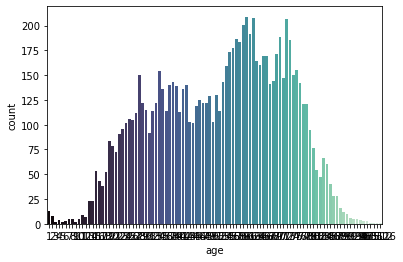

In [13]:
sns.countplot(dfT['age'], palette='mako');
# dfT[dfT['age'] <= 0] >>>> sem idades negativas

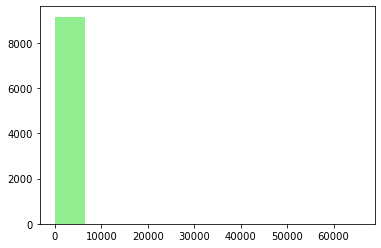

In [70]:
plt.hist(x = dfT['age'], color='lightgreen');

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


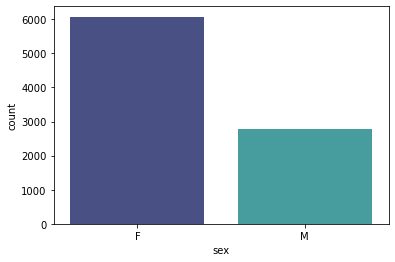

In [61]:
sns.countplot(dfT['sex'], palette='mako');

In [60]:
dfT.mean()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_1908\108886461.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfT.mean()


age     73.555822
TSH      5.218403
T3       1.970629
TT4    108.700305
T4U      0.976056
FTI    113.640746
TBG     29.870057
dtype: float64

In [63]:
## Label Enconder para tratamento de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

# Tratando os atributos categóricos

label_enconder_sex = LabelEncoder()
label_encoder_on_thyroxine = LabelEncoder()
label_encoder_query_on_thyroxine = LabelEncoder()
label_encoder_on_antithyroid_meds = LabelEncoder()
label_encoder_sick = LabelEncoder()
label_encoder_pregnant = LabelEncoder()
label_encoder_thyroid_surgery = LabelEncoder()
label_encoder_I131_treatment = LabelEncoder()
label_encoder_query_hypothyroid = LabelEncoder()
label_encoder_query_hyperthyroid = LabelEncoder()
label_encoder_lithium = LabelEncoder()
label_encoder_goitre = LabelEncoder()
label_encoder_tumor = LabelEncoder()
label_encoder_hypopituitary = LabelEncoder()
label_encoder_psych = LabelEncoder()
label_encoder_TSH_measured = LabelEncoder()
label_encoder_TSH = LabelEncoder()
label_encoder_T3_measured = LabelEncoder()
label_encoder_T3 = LabelEncoder()
label_encoder_TT4_measured = LabelEncoder()
# label_encoder_T4U_measured = LabelEncoder() ## int
label_encoder_FTI_measured = LabelEncoder()
# label_encoder_FTI = LabelEncoder() ## int
label_encoder_TBG_measured = LabelEncoder()
# label_encoder_TBG = LabelEncoder() ## int
label_encoder_referral_source = LabelEncoder()
label_encoder_target = LabelEncoder()

X[:,1] = label_enconder_sex.fit_transform(X[:,1])
X[:,3] = label_encoder_on_thyroxine.fit_transform(X[:,3])
X[:,5] = label_encoder_query_on_thyroxine.fit_transform(X[:,5])
X[:,6] = label_encoder_on_antithyroid_meds.fit_transform(X[:,6])
X[:,7] = label_encoder_sick.fit_transform(X[:,7])
X[:,8] = label_encoder_pregnant.fit_transform(X[:,8])
X[:,9] = label_encoder_thyroid_surgery.fit_transform(X[:,9])
X[:,13] = label_encoder_I131_treatment.fit_transform(X[:,13])
X[:,14] = label_encoder_query_hypothyroid.fit_transform(X[:,14])
X[:,15] = label_encoder_query_hyperthyroid.fit_transform(X[:,15])
X[:,16] = label_encoder_lithium.fit_transform(X[:,16])
X[:,17] = label_encoder_goitre.fit_transform(X[:,17])
X[:,18] = label_encoder_tumor.fit_transform(X[:,18])
X[:,19] = label_encoder_hypopituitary.fit_transform(X[:,19])
X[:,20] = label_encoder_psych.fit_transform(X[:,20])
X[:,21]= label_encoder_TSH_measured.fit_transform(X[:,21])
X[:,22]= label_encoder_TSH.fit_transform(X[:,22])
X[:,23] = label_encoder_T3_measured.fit_transform(X[:,23])
X[:,24]= label_encoder_T3.fit_transform(X[:,24])
X[:,25]= label_encoder_TT4_measured.fit_transform(X[:,25])
X[:,26]=label_encoder_FTI_measured.fit_transform(X[:,26])
X[:,27]= label_encoder_TBG_measured.fit_transform(X[:,27])
X[:,28]= label_encoder_referral_source.fit_transform(X[:,28])
#y[:,29] = label_encoder_target.fit_transform(y[:,29])

In [73]:
X = dfT.iloc[:, 0:29].values
X

array([[29, 'F', 'f', ..., 'f', nan, 'other'],
       [29, 'F', 'f', ..., 'f', nan, 'other'],
       [41, 'F', 'f', ..., 't', 11.0, 'other'],
       ...,
       [69, 'M', 'f', ..., 'f', nan, 'SVI'],
       [47, 'F', 'f', ..., 'f', nan, 'other'],
       [31, 'M', 'f', ..., 'f', nan, 'other']], dtype=object)

In [72]:
# Escalonamento das variáeis
from sklearn.preprocessing import StandardScaler


In [ ]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


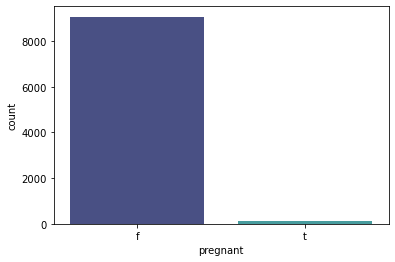

In [20]:
# praticamente todas as mulheres do banco de dados estavam grávidas durante as análises

sns.countplot(dfT['pregnant'], palette='mako');

In [21]:
dfT.corr(), dfT.cov()

(          age       TSH        T3       TT4       T4U       FTI       TBG
 age  1.000000 -0.003979  0.004523  0.004122 -0.002045  0.004108 -0.122787
 TSH -0.003979  1.000000 -0.159372 -0.275915  0.075857 -0.275468 -0.117742
 T3   0.004523 -0.159372  1.000000  0.550381  0.345649  0.370423 -0.012619
 TT4  0.004122 -0.275915  0.550381  1.000000  0.368754  0.751199 -0.025716
 T4U -0.002045  0.075857  0.345649  0.368754  1.000000 -0.238970  0.614947
 FTI  0.004108 -0.275468  0.370423  0.751199 -0.238970  1.000000 -0.200290
 TBG -0.122787 -0.117742 -0.012619 -0.025716  0.614947 -0.200290  1.000000,
               age         TSH         T3          TT4       T4U          FTI  \
 age  1.401801e+06 -119.536798   4.586167   187.692631 -0.507961   211.558177   
 TSH -1.195368e+02  584.866153  -3.414804  -247.978573  0.373096  -273.335743   
 T3   4.586167e+00   -3.414804   0.787796    18.351183  0.060485    13.917380   
 TT4  1.876926e+02 -247.978573  18.351183  1407.950791  2.784093  1176.8332

In [22]:
dfT.shape, dfT.columns

((9172, 30),
 Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
        'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
        'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
        'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
        'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
        'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
        'target'],
       dtype='object'))

In [67]:
X = dfT.iloc[:, 0:29].values
X

array([[29, 'F', 'f', ..., 'f', nan, 'other'],
       [29, 'F', 'f', ..., 'f', nan, 'other'],
       [41, 'F', 'f', ..., 't', 11.0, 'other'],
       ...,
       [69, 'M', 'f', ..., 'f', nan, 'SVI'],
       [47, 'F', 'f', ..., 'f', nan, 'other'],
       [31, 'M', 'f', ..., 'f', nan, 'other']], dtype=object)

In [24]:
X.shape

(9172, 29)

In [25]:
dfT['target'].values

array(['-', '-', '-', ..., 'I', '-', '-'], dtype=object)

In [26]:
## Label Enconder para tratamento de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

In [27]:
# Tratando os atributos categóricos

label_enconder_sex = LabelEncoder()
label_encoder_on_thyroxine = LabelEncoder()
label_encoder_query_on_thyroxine = LabelEncoder()
label_encoder_on_antithyroid_meds = LabelEncoder()
label_encoder_sick = LabelEncoder()
label_encoder_pregnant = LabelEncoder()
label_encoder_thyroid_surgery = LabelEncoder()
label_encoder_I131_treatment = LabelEncoder()
label_encoder_query_hypothyroid = LabelEncoder()
label_encoder_query_hyperthyroid = LabelEncoder()
label_encoder_lithium = LabelEncoder()
label_encoder_goitre = LabelEncoder()
label_encoder_tumor = LabelEncoder()
label_encoder_hypopituitary = LabelEncoder()
label_encoder_psych = LabelEncoder()
label_encoder_TSH_measured = LabelEncoder()
label_encoder_TSH = LabelEncoder()
label_encoder_T3_measured = LabelEncoder()
label_encoder_T3 = LabelEncoder()
label_encoder_TT4_measured = LabelEncoder()
# label_encoder_T4U_measured = LabelEncoder() ## int
label_encoder_FTI_measured = LabelEncoder()
# label_encoder_FTI = LabelEncoder() ## int
label_encoder_TBG_measured = LabelEncoder()
# label_encoder_TBG = LabelEncoder() ## int
label_encoder_referral_source = LabelEncoder()
label_encoder_target = LabelEncoder()

X[:,1] = label_enconder_sex.fit_transform(X[:,1])
X[:,3] = label_encoder_on_thyroxine.fit_transform(X[:,3])
X[:,5] = label_encoder_query_on_thyroxine.fit_transform(X[:,5])
X[:,6] = label_encoder_on_antithyroid_meds.fit_transform(X[:,6])
X[:,7] = label_encoder_sick.fit_transform(X[:,7])
X[:,8] = label_encoder_pregnant.fit_transform(X[:,8])
X[:,9] = label_encoder_thyroid_surgery.fit_transform(X[:,9])
X[:,13] = label_encoder_I131_treatment.fit_transform(X[:,13])
X[:,14] = label_encoder_query_hypothyroid.fit_transform(X[:,14])
X[:,15] = label_encoder_query_hyperthyroid.fit_transform(X[:,15])
X[:,16] = label_encoder_lithium.fit_transform(X[:,16])
X[:,17] = label_encoder_goitre.fit_transform(X[:,17])
X[:,18] = label_encoder_tumor.fit_transform(X[:,18])
X[:,19] = label_encoder_hypopituitary.fit_transform(X[:,19])
X[:,20] = label_encoder_psych.fit_transform(X[:,20])
X[:,21]= label_encoder_TSH_measured.fit_transform(X[:,21])
X[:,22]= label_encoder_TSH.fit_transform(X[:,22])
X[:,23] = label_encoder_T3_measured.fit_transform(X[:,23])
X[:,24]= label_encoder_T3.fit_transform(X[:,24])
X[:,25]= label_encoder_TT4_measured.fit_transform(X[:,25])
X[:,26]=label_encoder_FTI_measured.fit_transform(X[:,26])
X[:,27]= label_encoder_TBG_measured.fit_transform(X[:,27])
X[:,28]= label_encoder_referral_source.fit_transform(X[:,28])
#y[:,29] = label_encoder_target.fit_transform(y[:,29])

In [29]:
y = dfT.iloc[:, 29].values
y

array(['-', '-', '-', ..., 'I', '-', '-'], dtype=object)

In [30]:
dfT.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


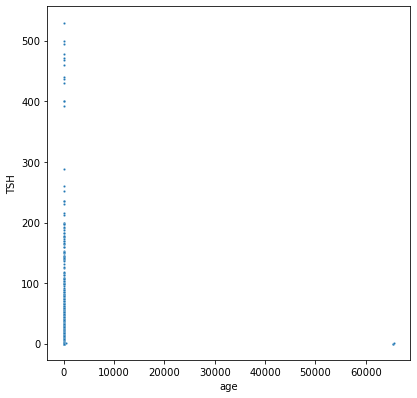

In [53]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(data=dfT, x='age', y='TSH', s=5);